In [1]:
# IMPORT FILE SET PARAMETERS

In [43]:
import pandas as pd
import folium
import math
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns
import numpy as np
import numpy
import pyproj
from scipy.stats import kde
import pathlib

In [3]:
# IMPORT FILES

In [53]:
currentdir=pathlib.Path("../data/geolocalization/.")
currentpattern="*.csv"
counter=0
for currentfile in currentdir.glob(currentpattern):
  counter=counter+1
  print(currentfile)
  if (counter==1):
    df=pd.read_csv(currentfile, sep=";", encoding="iso8859_1")
  else:
    df=pd.concat([df, pd.read_csv(currentfile, sep=";", encoding="iso8859_1")])

..\data\geolocalization\0_to_1999_geoloc.csv
..\data\geolocalization\2000_to_3999_geoloc.csv
..\data\geolocalization\4000_to_5999_geoloc.csv


In [54]:
df

Unnamed: 0  Unnamed: 0.1  anno  provincia  comune  giorno  \
0              0         89310    16         15     146       6   
1              1         93706    16         15     146       5   
2              2         93711    16         15     146       7   
3              3         93715    16         15     146       3   
4              4         93725    16         15     146       4   
5              5         93749    16         15     146       6   
6              6         93768    16         15     146       3   
7              7         93776    16         15     146       2   
8              8         93781    16         15     146       1   
9              9         93787    16         15     146       3   
10            10         93788    16         15     146       2   
11            11         93806    16         15     146       6   
12            12         93840    16         15     146       2   
13            13         93842    16         15     146       2   
14            14         93851    16         15     146       1   
15            15         93856    16         15     146       5   
16            16         93860    16         15     146       1   
17            17         93876    16         15     146       6   
18            18         93903    16         15     146       2   
19            19         93907    16         15     146       2   
20            20         98399    16         15     146       4   
21            21         98400    16         15     146       5   
22            22         98401    16         15     146       6   
23            23         98402    16         15     146       2   
24            24         98403    16         15     146       3   
25            25         98404    16         15     146       3   
26            26         98405    16         15     146       3   
27            27         98406    16         15     146       3   
28            28         98407    16         15     146       3   
29            29         98408    16         15     146       4   
...          ...           ...   ...        ...     ...     ...   
1970        1970        113925    16         15     146       5   
1971        1971        113926    16         15     146       5   
1972        1972        113927    16         15     146       5   
1973        1973        113928    16         15     146       5   
1974        1974        113929    16         15     146       5   
1975        1975        113930    16         15     146       5   
1976        1976        113931    16         15     146       5   
1977        1977        113932    16         15     146       5   
1978        1978        113933    16         15     146       6   
1979        1979        113934    16         15     146       6   
1980        1980        113935    16         15     146       7   
1981        1981        113936    16         15     146       7   
1982        1982        113937    16         15     146       7   
1983        1983        113938    16         15     146       7   
1984        1984        113939    16         15     146       2   
1985        1985        113940    16         15     146       2   
1986        1986        113941    16         15     146       2   
1987        1987        113942    16         15     146       2   
1988        1988        113943    16         15     146       2   
1989        1989        113944    16         15     146       3   
1990        1990        113945    16         15     146       3   
1991        1991        113946    16         15     146       4   
1992        1992        113947    16         15     146       4   
1993        1993        113948    16         15     146       4   
1994        1994        113949    16         15     146       5   
1995        1995        113950    16         15     146       5   
1996        1996        113951    16         15     146       5   
1997        1997        113952    16         15     1

In [55]:
print("Numero di righe: ", len(df.index))

Numero di righe:  6000


In [56]:
# PER QUALCHE MOTIVO LONG E LAT SONO STRINGHE E HANNO LA VIRGOLA, CONVERTIAMOLE IN NUMERI DECENTI

In [57]:
df['Long']=df['Long'].apply(lambda x: float(str(x).replace(',', '.')))

In [58]:
df['Lat']=df['Lat'].apply(lambda x: float(str(x).replace(',', '.')))

In [59]:
# CENTRO DI MILANO, E VERIFICA TRASFORMAZIONE COORDINATE

In [60]:
duomo=[9.191383, 45.464211]
pyproj.transform(pyproj.Proj(init="epsg:4326"), pyproj.Proj(init="epsg:3003"), duomo[0], duomo[1])

(1514989.607541632, 5034558.2905771015)

In [61]:
# TRASFORMAZIONE DELLE COORDINATE

In [62]:
x=numpy.array([])
y=numpy.array([])
xgb=numpy.array([])
ygb=numpy.array([])
mymap=folium.Map([duomo[1], duomo[0]], zoom_start=11)

for counter in range(0, len(df.index)):
  mylocation=[float(df.iloc[counter, 119]), df.iloc[counter, 120]]
  if ((not math.isnan(mylocation[1])) & (not math.isnan(mylocation[0]))):
    deltax=0.15
    xmean=9.149733
    deltay=0.15
    ymean=45.449232
    if (mylocation[0]>xmean-deltax) & (mylocation[0]<xmean+deltax) & (mylocation[1]>ymean-deltay) & (mylocation[1]<ymean+deltay):
      x=numpy.append(x,[mylocation[0]])
      y=numpy.append(y,[mylocation[1]])
      x1, y1=mylocation[0], mylocation[1]
      x2, y2=pyproj.transform(pyproj.Proj(init="epsg:4326"), pyproj.Proj(init="epsg:3003"), x1, y1)
      xgb=numpy.append(xgb, x2)
      ygb=numpy.append(ygb, y2)
      if (counter<100): # SAMPLE DI 100 EVENTI O IL PLOT CRASHA
        folium.Marker([mylocation[1], mylocation[0]]).add_to(mymap)
print("Media long: ", numpy.mean(x), ", Devst long: ", numpy.std(x), " - Media lat: ", numpy.mean(y), ", Devst lat: ", numpy.std(y))
print("Lunghezza dati considerati: ", len(x))
print("Media long GB: ", numpy.mean(xgb), " - Media long GB: ", numpy.mean(ygb))

Media long:  9.182065426555946 , Devst long:  0.03677466363089182  - Media lat:  45.472717058798864 , Devst lat:  0.023456996103423295
Lunghezza dati considerati:  5961
Media long GB:  1514259.023830665  - Media long GB:  5035502.275455263


In [63]:
# EVENTS PLOT

In [64]:
mymap

In [81]:
# BIN SIZE DEFINITION

In [93]:
hsize=max(xgb)-min(xgb)
vsize=max(ygb)-min(ygb)
print("Dimensione rettangolo considerato in metri:", hsize, vsize)
binsize_meters_desidered=50
nbins=np.round((hsize+vsize)/(2*binsize_meters_desidered))
print("Numero di bins lato x e y", nbins)
hsizebin=hsize/nbins
vsizebin=vsize/nbins
print("Dimensione bin: ", hsizebin, vsizebin)

Dimensione rettangolo considerato in metri: 17616.13769746595 18145.803690071218
Numero di bins lato x e y 358.0
Dimensione bin:  49.20708854040768 50.68660248623245


In [65]:
# RATE DENSITY PLOT - NON NORMALIZZATO

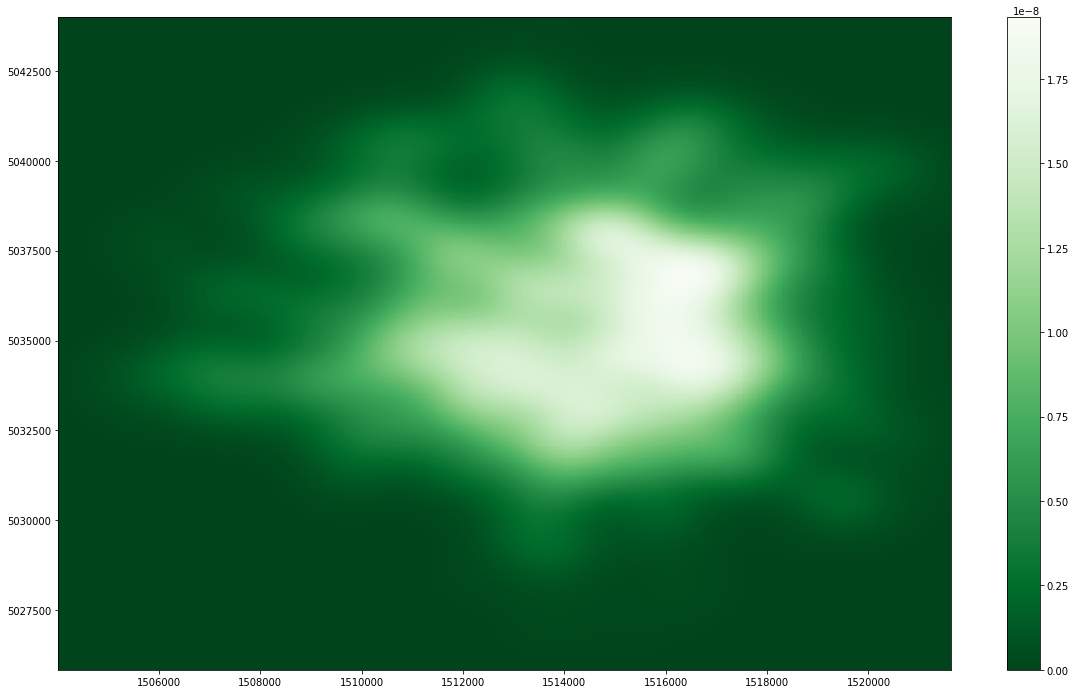

In [108]:
plt.rcParams["figure.figsize"] = (20,12)
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
#k = kde.gaussian_kde([x,y])
#xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
#kde.factor=1
#k = kde.gaussian_kde([xgb,ygb], bw_method="scalar")
k = kde.gaussian_kde([xgb,ygb])
xi, yi = np.mgrid[xgb.min():xgb.max():nbins*1j, ygb.min():ygb.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
plt.colorbar()
plt.show()

In [67]:
# RATE DENSITY PLOT - NORMALIZZATO

In [106]:
print(sum(zi))
zi=zi/(sum(zi))*(len(x)/366)
print(sum(zi))

0.00039823491892990236
16.286885245901544


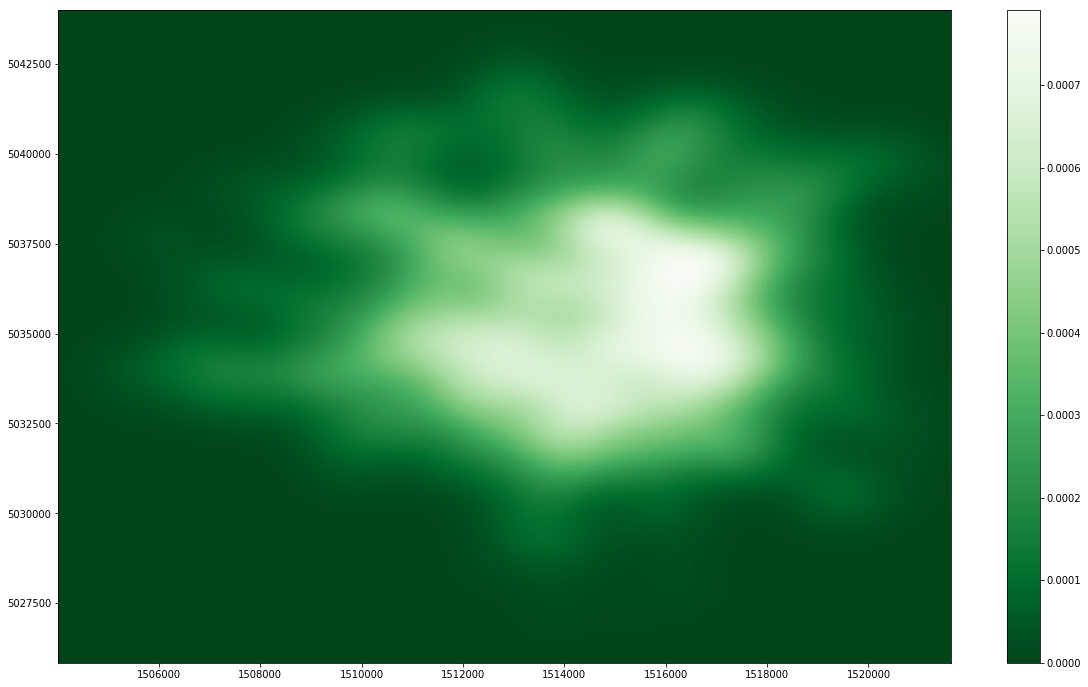

In [107]:
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Greens_r)
plt.colorbar()
plt.show()

In [97]:
np.mean(zi)*nbins*nbins

16.28688524590147

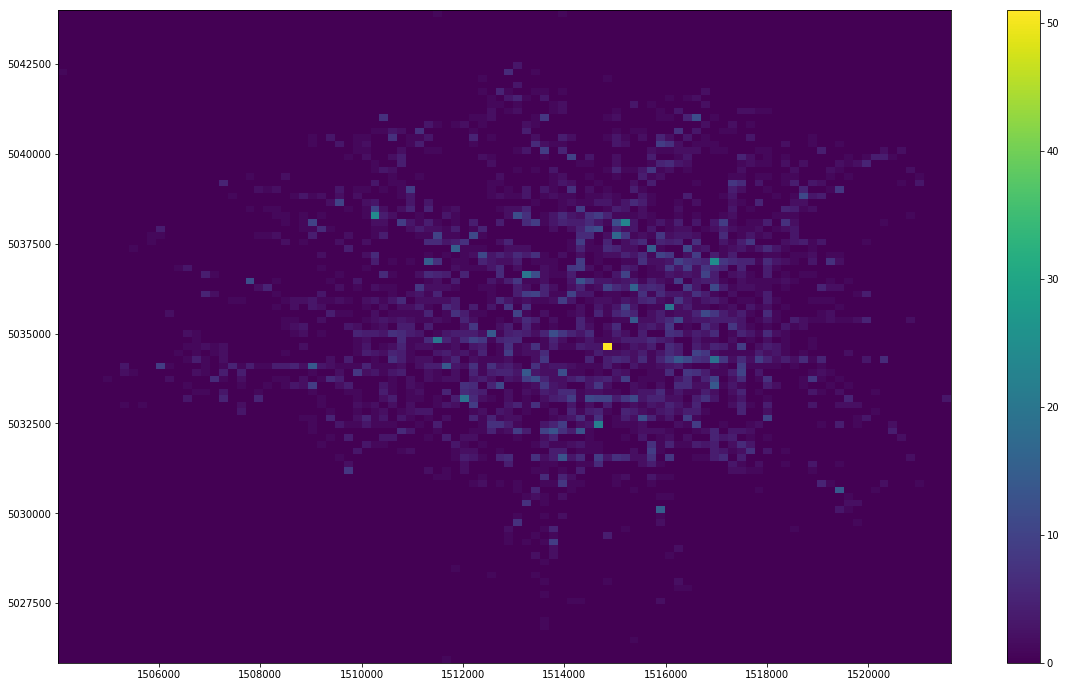

In [71]:
h=plt.hist2d(xgb, ygb, bins=100)
plt.colorbar()
plt.show()


In [98]:
# CERCHIAMO I BIN CON ALMENO 10 INCIDENTI

In [99]:
best=np.where(h[0]>=10)
print("Bin trovati   : ", len(best[0]))
print("Valore massimo: ", numpy.max(h[0]))

Bin trovati   :  72
Valore massimo:  51.0


In [37]:
xtop=np.array([])
ytop=np.array([])
ztop=np.array([])
for i in range(0, len(best[0])):
  xt,yt=pyproj.transform(pyproj.Proj(init="epsg:3003"), pyproj.Proj(init="epsg:4326"), h[1][best[0][i]], h[2][best[1][i]])
  zt=h[0][best[0][i]][best[1][i]]
  xtop=numpy.append(xtop, xt)
  ytop=numpy.append(ytop, yt)
  ztop=numpy.append(ztop, zt)
  print(xt, yt, zt)

9.098380948551096 45.480598600367074 12.0
9.114116169679571 45.459351030198256 14.0
9.114188508867183 45.49528364789701 10.0
9.120962704480075 45.50017658988076 10.0
9.129974298374089 45.4969001221684 24.0
9.129978046332655 45.49853341615527 10.0
9.143473178693862 45.48545090386287 15.0
9.14567696964168 45.46584846603204 20.0
9.145744171069989 45.491981238921014 10.0
9.147913325188737 45.45931236527593 14.0
9.150244392125241 45.48870882096186 15.0
9.15239765723814 45.451139931363585 19.0
9.154690574488352 45.46583664163181 10.0
9.154761943495945 45.49196940379073 11.0
9.157002801089405 45.487066450541974 11.0
9.159201962612578 45.46746376351608 14.0
9.16141821509486 45.45439418905554 11.0
9.165976707147456 45.47235405915634 10.0
9.166048521039384 45.49685348561722 12.0
9.168186736329405 45.457651064026955 14.0
9.168259471059446 45.48215055104749 20.0
9.170434898385455 45.456014428318795 12.0
9.170498770318028 45.477247326815544 10.0
9.17051352012128 45.4821472152046 12.0
9.172648115164

In [100]:
mymap=folium.Map([duomo[1], duomo[0]], zoom_start=12)
for counter in range(0, len(xtop)):
  mylocation=[ytop[counter], xtop[counter]]
  folium.CircleMarker(mylocation, radius=ztop[counter], fill=True).add_to(mymap)
mymap